In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/Users/pavankumar/Desktop/Titanic-Dataset.csv")

In [34]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
5,0,3,1,28.0,0,0,8.4583
6,0,1,1,54.0,0,0,51.8625
7,0,3,1,2.0,3,1,21.0750
8,1,3,0,27.0,0,2,11.1333
9,1,2,0,14.0,1,0,30.0708


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
df.tail(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
881,0,3,1,33.0,0,0,7.8958
882,0,3,0,22.0,0,0,10.5167
883,0,2,1,28.0,0,0,10.5000
884,0,3,1,25.0,0,0,7.0500
885,0,3,0,39.0,0,5,29.1250
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,28.0,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000
890,0,3,1,32.0,0,0,7.7500


In [7]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


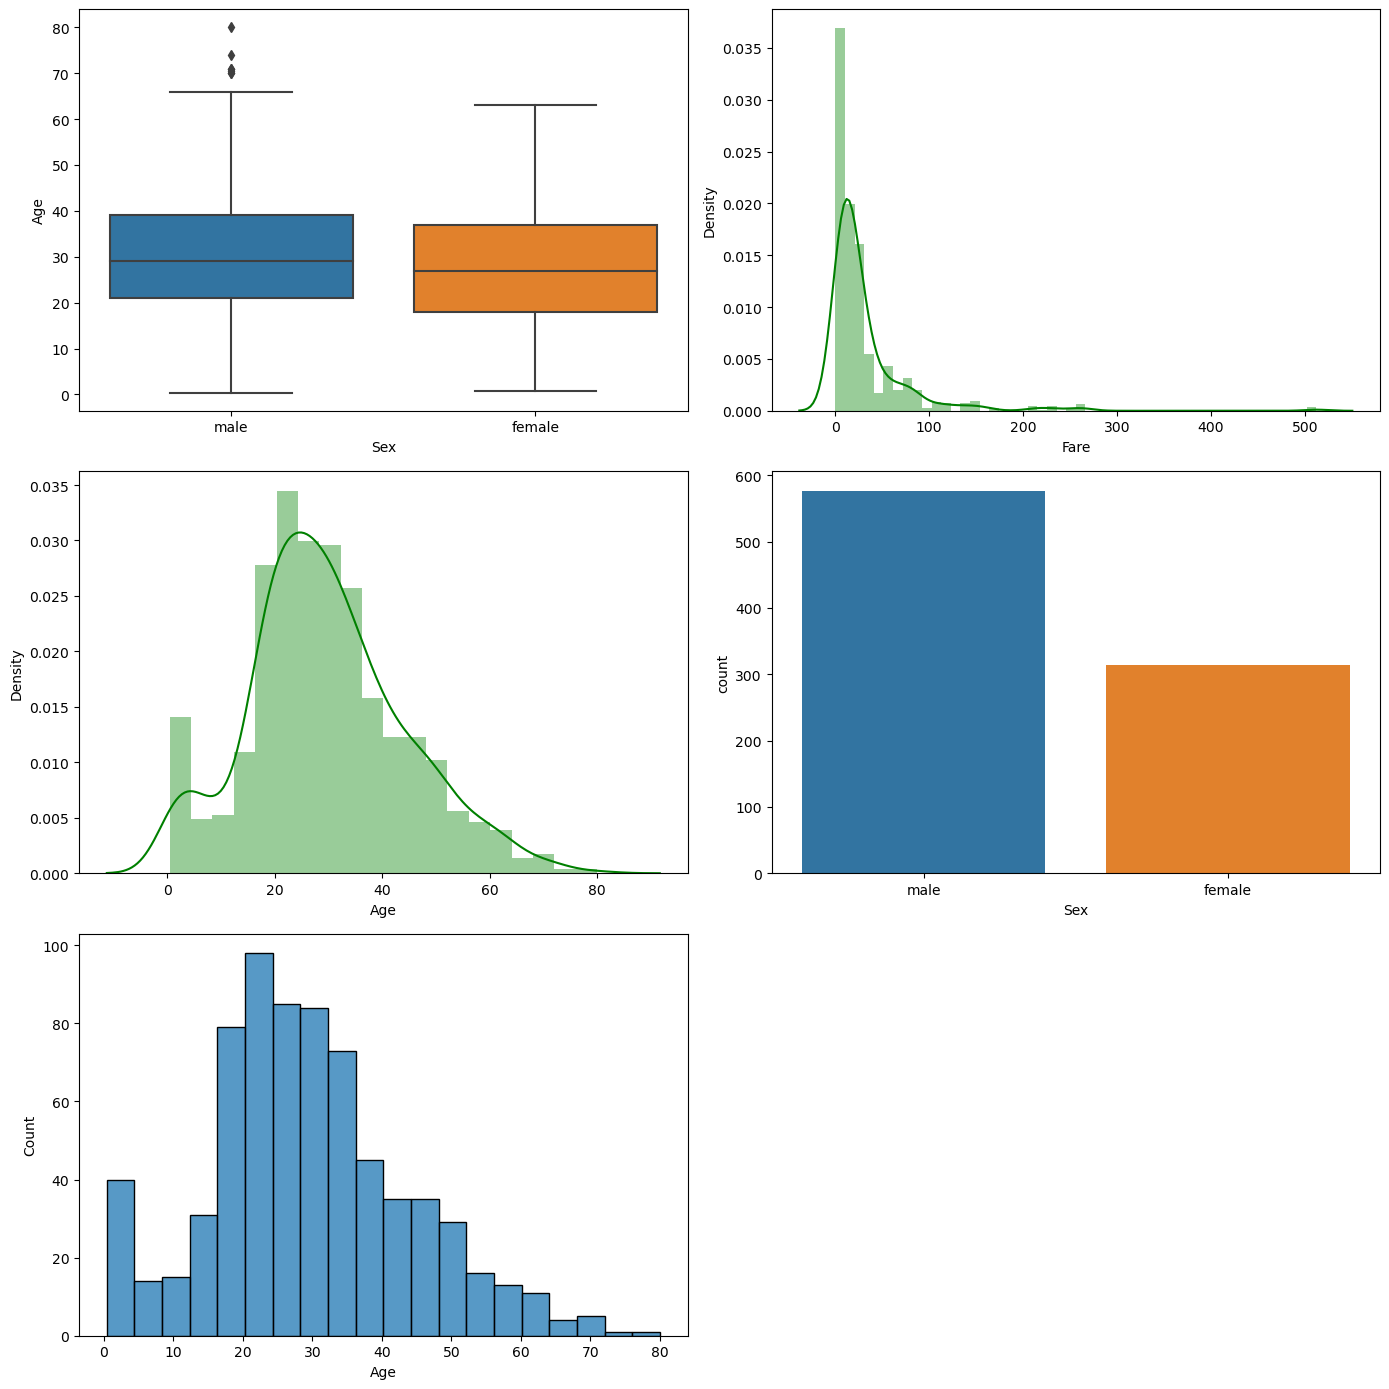

In [9]:
plt.figure(figsize=(14,14))
plt.subplot(3,2,1)
sns.boxplot(x='Sex',y='Age',data=df)

plt.subplot(3,2,2)
sns.distplot(df['Fare'],color='g')

plt.subplot(3,2,3)
sns.distplot(df['Age'],color='g')

plt.subplot(3,2,4)
sns.countplot(x='Sex',data=df)

plt.subplot(3,2,5)
sns.histplot(df['Age'])

plt.tight_layout()
plt.show()

In [10]:
df.drop(columns=['PassengerId','Name','Ticket','Embarked','Cabin'],inplace=True)

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [12]:
df['Sex']=df['Sex'].map({'male':1,'female':0})
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [13]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [14]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Fare']=df['Fare'].fillna(df['Fare'].median())

In [15]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [17]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


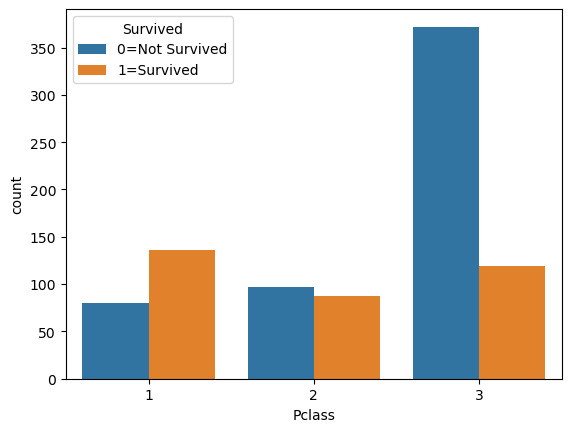

In [19]:
sns.countplot(x='Pclass',data=df,hue='Survived')
legend_labels={0:'Not Survived',1:'Survived'}
plt.legend(title='Survived',labels=[f"{key}={value}" for key, value in legend_labels.items()])
plt.show()

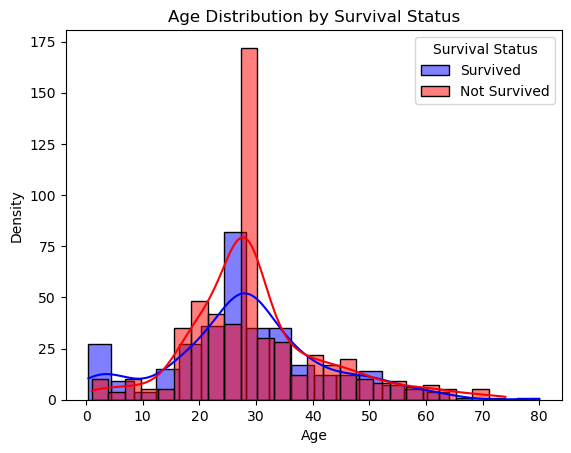

In [20]:
sns.histplot(data=df[df['Survived']==1],x='Age',kde=True,color='blue',label='Survived')
sns.histplot(data=df[df['Survived']==0],x='Age',kde=True,color='red',label='Not Survived')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Survival Status')
plt.legend(title='Survival Status')
plt.show()

<AxesSubplot:>

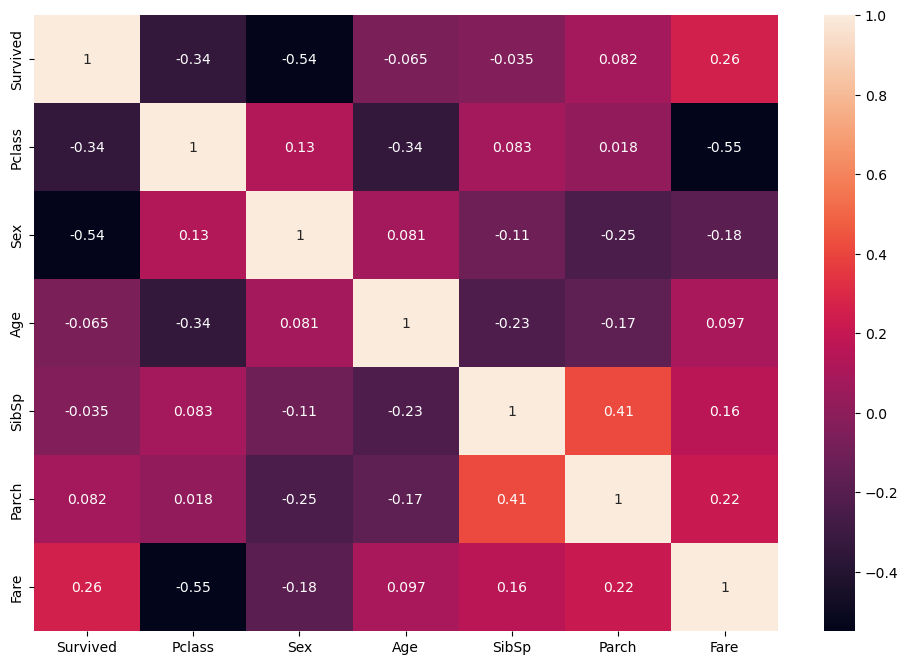

In [21]:
plt.figure(figsize=[12,8])
sns.heatmap(df.corr(),annot=True)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

In [23]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [24]:
scaler= StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [25]:
models ={'Logistic Regression': LogisticRegression(),
        'Decision Tress ': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Support Vector Machine': GradientBoostingClassifier(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Neural Network':MLPClassifier(max_iter=1000)}

In [26]:
for model_name,model in models.items():
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    accuracy=accuracy_score(Y_test,Y_pred)
    report=classification_report(Y_test,Y_pred)
    print(f'{model_name}-Accuracy:{accuracy:2f}')
    print(f'classification Report:\n{report}\n')

Logistic Regression-Accuracy:0.787709
classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       101
           1       0.81      0.67      0.73        78

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.78       179


Decision Tress -Accuracy:0.782123
classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       101
           1       0.82      0.64      0.72        78

    accuracy                           0.78       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179


Random Forest-Accuracy:0.804469
classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       101
           1       0.84      0.68      0.75        78

    acc

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rand=RandomForestClassifier()
normal=MinMaxScaler()

In [28]:
normal_fit=normal.fit(X_train)
new_xtrain=normal_fit.transform(X_train)
new_xtest=normal_fit.transform(X_test)

In [29]:
fit_rand = rand.fit(new_xtrain, Y_train)
rand_score=rand.score(new_xtest,Y_test)
print('Score of model is:',rand_score*100,'%')

Score of model is: 79.88826815642457 %


In [33]:
X_predict=list(rand.predict(X_test))
predicted_df={'predicted_values':X_predict,'orginal_values': Y_test}
print(pd.DataFrame(predicted_df).head(10))
print('')
print('here 0=not survived and 1= survived')

     predicted_values  orginal_values
558                 0               1
547                 1               1
494                 1               0
679                 0               1
7                   0               0
248                 0               1
222                 1               0
589                 1               0
356                 0               1
315                 1               1

here 0=not survived and 1= survived
